## 1. Core Dependencies and Libraries

In [81]:
# ===============================
# Essential Computing Libraries
# ===============================
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder
)

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold
)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

from scipy.stats import zscore
from sklearn import metrics

## 2. Dataset Import and Initial Exploration

In [82]:
# Load the catalog of extrasolar worlds
catalog = pd.read_csv("phl_exoplanet_catalog_2019.csv")

In [83]:
# Display complete dataset
catalog

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.863300,1.29000
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.784800,1.53000
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.574400,0.83000
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.078500,2.93000
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,K2-296 b,3.0,NaN,NaN,NaN,1.87,0.45,0.2,2019,5/23/19,...,0,Warm,2,0.755038,Virgo,Vir,Virgin,1.870000,4.155456,0.13456
4044,K2-296 c,3.0,NaN,NaN,NaN,2.76,NaN,NaN,2019,5/23/19,...,0,Hot,0,0.363831,Virgo,Vir,Virgin,2.760000,8.047485,0.05769
4045,GJ 1061 b,3.0,1.38000,0.15000,0.16000,NaN,NaN,NaN,2019,9/3/19,...,0,Hot,0,0.588562,Horologium,Hor,Pendulum Clock,1.102775,1.380000,0.02100
4046,GJ 1061 c,3.0,1.75000,0.23000,0.23000,NaN,NaN,NaN,2019,9/3/19,...,0,Warm,1,0.879042,Horologium,Hor,Pendulum Clock,1.178333,1.750000,0.03500


### Initial Data Visualization

In [84]:
# First observations
catalog.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [85]:
# Final observations
catalog.tail()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
4043,K2-296 b,3.0,NaN,NaN,NaN,1.87,0.45,0.2,2019,5/23/19,...,0,Warm,2,0.755038,Virgo,Vir,Virgin,1.870000,4.155456,0.13456
4044,K2-296 c,3.0,NaN,NaN,NaN,2.76,NaN,NaN,2019,5/23/19,...,0,Hot,0,0.363831,Virgo,Vir,Virgin,2.760000,8.047485,0.05769
4045,GJ 1061 b,3.0,1.38,0.15,0.16,NaN,NaN,NaN,2019,9/3/19,...,0,Hot,0,0.588562,Horologium,Hor,Pendulum Clock,1.102775,1.380000,0.02100
4046,GJ 1061 c,3.0,1.75,0.23,0.23,NaN,NaN,NaN,2019,9/3/19,...,0,Warm,1,0.879042,Horologium,Hor,Pendulum Clock,1.178333,1.750000,0.03500
4047,GJ 1061 d,3.0,1.68,0.24,0.25,NaN,NaN,NaN,2019,9/3/19,...,1,Warm,1,0.798200,Horologium,Hor,Pendulum Clock,1.164989,1.680000,0.05400


### Data Structure Analysis

In [86]:
# List all feature names
field_names = catalog.columns
for field in field_names:
    print(field)

P_NAME
P_STATUS
P_MASS
P_MASS_ERROR_MIN
P_MASS_ERROR_MAX
P_RADIUS
P_RADIUS_ERROR_MIN
P_RADIUS_ERROR_MAX
P_YEAR
P_UPDATED
P_PERIOD
P_PERIOD_ERROR_MIN
P_PERIOD_ERROR_MAX
P_SEMI_MAJOR_AXIS
P_SEMI_MAJOR_AXIS_ERROR_MIN
P_SEMI_MAJOR_AXIS_ERROR_MAX
P_ECCENTRICITY
P_ECCENTRICITY_ERROR_MIN
P_ECCENTRICITY_ERROR_MAX
P_INCLINATION
P_INCLINATION_ERROR_MIN
P_INCLINATION_ERROR_MAX
P_OMEGA
P_OMEGA_ERROR_MIN
P_OMEGA_ERROR_MAX
P_TPERI
P_TPERI_ERROR_MIN
P_TPERI_ERROR_MAX
P_ANGULAR_DISTANCE
P_IMPACT_PARAMETER
P_IMPACT_PARAMETER_ERROR_MIN
P_IMPACT_PARAMETER_ERROR_MAX
P_TEMP_MEASURED
P_GEO_ALBEDO
P_GEO_ALBEDO_ERROR_MIN
P_GEO_ALBEDO_ERROR_MAX
P_DETECTION
P_DETECTION_MASS
P_DETECTION_RADIUS
P_ALT_NAMES
P_ATMOSPHERE
S_NAME
S_RA
S_DEC
S_MAG
S_DISTANCE
S_DISTANCE_ERROR_MIN
S_DISTANCE_ERROR_MAX
S_METALLICITY
S_METALLICITY_ERROR_MIN
S_METALLICITY_ERROR_MAX
S_MASS
S_MASS_ERROR_MIN
S_MASS_ERROR_MAX
S_RADIUS
S_RADIUS_ERROR_MIN
S_RADIUS_ERROR_MAX
S_TYPE
S_AGE
S_AGE_ERROR_MIN
S_AGE_ERROR_MAX
S_TEMPERATURE
S_TEMPERATURE

In [87]:
# Display dimensions
print(catalog.shape)

(4048, 112)


In [88]:
# Detailed information
catalog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


In [89]:
# Statistical overview
catalog.describe()

,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_PERIOD,P_PERIOD_ERROR_MIN,...,S_SNOW_LINE,S_ABIO_ZONE,S_TIDAL_LOCK,P_HABZONE_OPT,P_HABZONE_CON,P_HABITABLE,P_ESI,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
count,4048.0,1598.000000,1467.000000,1467.000000,3139.000000,3105.000000,3105.000000,4048.000000,3.938000e+03,3.807000e+03,...,3786.000000,3.083000e+03,3281.000000,4048.000000,4048.000000,4048.000000,3721.000000,4048.000000,4048.000000,3978.000000
mean,3.0,798.384920,-152.292232,190.289692,4.191426,-0.483990,0.621867,2014.212945,2.309342e+03,-1.073631e+03,...,3.513348,1.768991e+35,0.440103,0.049654,0.034091,0.021986,0.261252,5.588647,323.089993,4.011385
std,0.0,1406.808654,783.366353,1082.061976,4.776830,1.409048,2.007592,3.704839,1.167012e+05,5.943181e+04,...,5.463171,6.944274e+36,0.074285,0.217256,0.181485,0.195731,0.131333,5.392733,965.084290,62.389968
min,3.0,0.019070,-24965.390000,0.000000,0.336300,-54.592700,0.000000,1989.000000,9.070629e-02,-3.650000e+06,...,0.002405,7.293660e-05,0.030707,0.000000,0.000000,0.000000,0.006768,0.000000,0.000000,0.004400
25%,3.0,26.548968,-79.457001,4.449592,1.569400,-0.526870,0.145730,2014.000000,4.497336e+00,-1.129000e-03,...,1.740762,5.264169e-01,0.420337,0.000000,0.000000,0.000000,0.196982,1.703920,3.628101,0.053000
50%,3.0,273.332080,-24.154928,25.108412,2.331680,-0.235410,0.325090,2016.000000,1.187053e+01,-9.392000e-05,...,2.568600,1.429118e+00,0.448357,0.000000,0.000000,0.000000,0.271192,2.667980,7.815324,0.102199
75%,3.0,806.488560,-4.392383,85.813561,3.553570,-0.134520,0.661390,2016.000000,4.186661e+01,-1.594000e-05,...,3.661581,2.641037e+00,0.472140,0.000000,0.000000,0.000000,0.303346,11.770500,149.379160,0.260507
max,3.0,17668.059000,0.270000,26630.808000,77.349000,0.450000,68.919080,2019.000000,7.300000e+06,3.200000e-02,...,104.112780,2.726899e+38,1.322542,1.000000,1.000000,2.000000,0.931208,77.349000,17668.059000,2500.000000


### Data Quality Assessment

In [90]:
# Total missing values per column
catalog.isnull().sum()

P_NAME                      0
P_STATUS                    0
P_MASS                   2450
P_MASS_ERROR_MIN         2581
P_MASS_ERROR_MAX         2581
                         ... 
S_CONSTELLATION_ABR         0
S_CONSTELLATION_ENG         0
P_RADIUS_EST                0
P_MASS_EST                  0
P_SEMI_MAJOR_AXIS_EST      70
Length: 112, dtype: int64

In [91]:
# Only columns with missing data
catalog.isnull().sum()[catalog.isnull().sum() > 0]

P_MASS                   2450
P_MASS_ERROR_MIN         2581
P_MASS_ERROR_MAX         2581
P_RADIUS                  909
P_RADIUS_ERROR_MIN        943
                         ... 
S_ABIO_ZONE               965
S_TIDAL_LOCK              767
P_TYPE_TEMP               327
P_ESI                     327
P_SEMI_MAJOR_AXIS_EST      70
Length: 92, dtype: int64

In [92]:
# Target variable examination
print(catalog['P_HABITABLE'])

0       0
1       0
2       0
3       0
4       0
       ..
4043    2
4044    0
4045    0
4046    1
4047    1
Name: P_HABITABLE, Length: 4048, dtype: int64


In [93]:
# Unique target values
distinct_values = catalog['P_HABITABLE'].unique()
print("Unique values in target column:", distinct_values)

Unique values in target column: [0 2 1]


In [94]:
# Target distribution
catalog['P_HABITABLE'].value_counts()

P_HABITABLE
0    3993
2      34
1      21
Name: count, dtype: int64

### Feature Classification

In [95]:
# Separate feature types
numeric_features = catalog.select_dtypes(include=[np.number]).columns
categorical_features = catalog.select_dtypes(include=['object']).columns

print("Numeric Features:", len(numeric_features))
print("Categorical Features:", len(categorical_features))

Numeric Features: 98
Categorical Features: 14


In [96]:
# Numeric statistics
catalog[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
P_STATUS,4048.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000
P_MASS,1598.0,798.384920,1406.808654,0.019070,26.548968,273.332080,806.488560,17668.059000
P_MASS_ERROR_MIN,1467.0,-152.292232,783.366353,-24965.390000,-79.457001,-24.154928,-4.392383,0.270000
P_MASS_ERROR_MAX,1467.0,190.289692,1082.061976,0.000000,4.449592,25.108412,85.813561,26630.808000
P_RADIUS,3139.0,4.191426,4.776830,0.336300,1.569400,2.331680,3.553570,77.349000
...,...,...,...,...,...,...,...,...
P_HABITABLE,4048.0,0.021986,0.195731,0.000000,0.000000,0.000000,0.000000,2.000000
P_ESI,3721.0,0.261252,0.131333,0.006768,0.196982,0.271192,0.303346,0.931208
P_RADIUS_EST,4048.0,5.588647,5.392733,0.000000,1.703920,2.667980,11.770500,77.349000
P_MASS_EST,4048.0,323.089993,965.084290,0.000000,3.628101,7.815324,149.379160,17668.059000


In [97]:
# Categorical statistics
catalog[categorical_features].describe().T

,count,unique,top,freq
P_NAME,4048,4048,11 Com b,1
P_UPDATED,4048,184,2016-05-10,1282
P_DETECTION,4048,10,Transit,3114
S_NAME,4048,3010,Kepler-90,8
S_TYPE,1370,210,G5,56
S_ALT_NAMES,4048,584,",",3269
P_TYPE,4031,6,Jovian,1302
S_TYPE_TEMP,3912,7,G,1792
S_RA_T,4048,3010,18 57 44.0416,8
S_DEC_T,4048,3010,+49 18 18.5796,8


### Missing Data Comprehensive Report

In [98]:
# Generate missing value report
absence_count = catalog.isnull().sum()
absence_percentage = (absence_count / len(catalog)) * 100

absence_report = pd.DataFrame({
    'Missing_Count': absence_count,
    'Missing_Percentage': absence_percentage
})

absence_report[absence_report['Missing_Count'] > 0].sort_values(
    by='Missing_Percentage', ascending=False
)

,Missing_Count,Missing_Percentage
P_DETECTION_MASS,4048,100.000000
S_MAGNETIC_FIELD,4048,100.000000
P_DETECTION_RADIUS,4048,100.000000
P_GEO_ALBEDO,4048,100.000000
P_ATMOSPHERE,4048,100.000000
...,...,...
P_DISTANCE,70,1.729249
P_PERIASTRON,70,1.729249
P_SEMI_MAJOR_AXIS_EST,70,1.729249
P_TYPE,17,0.419960


### Visual Analysis of Data Quality

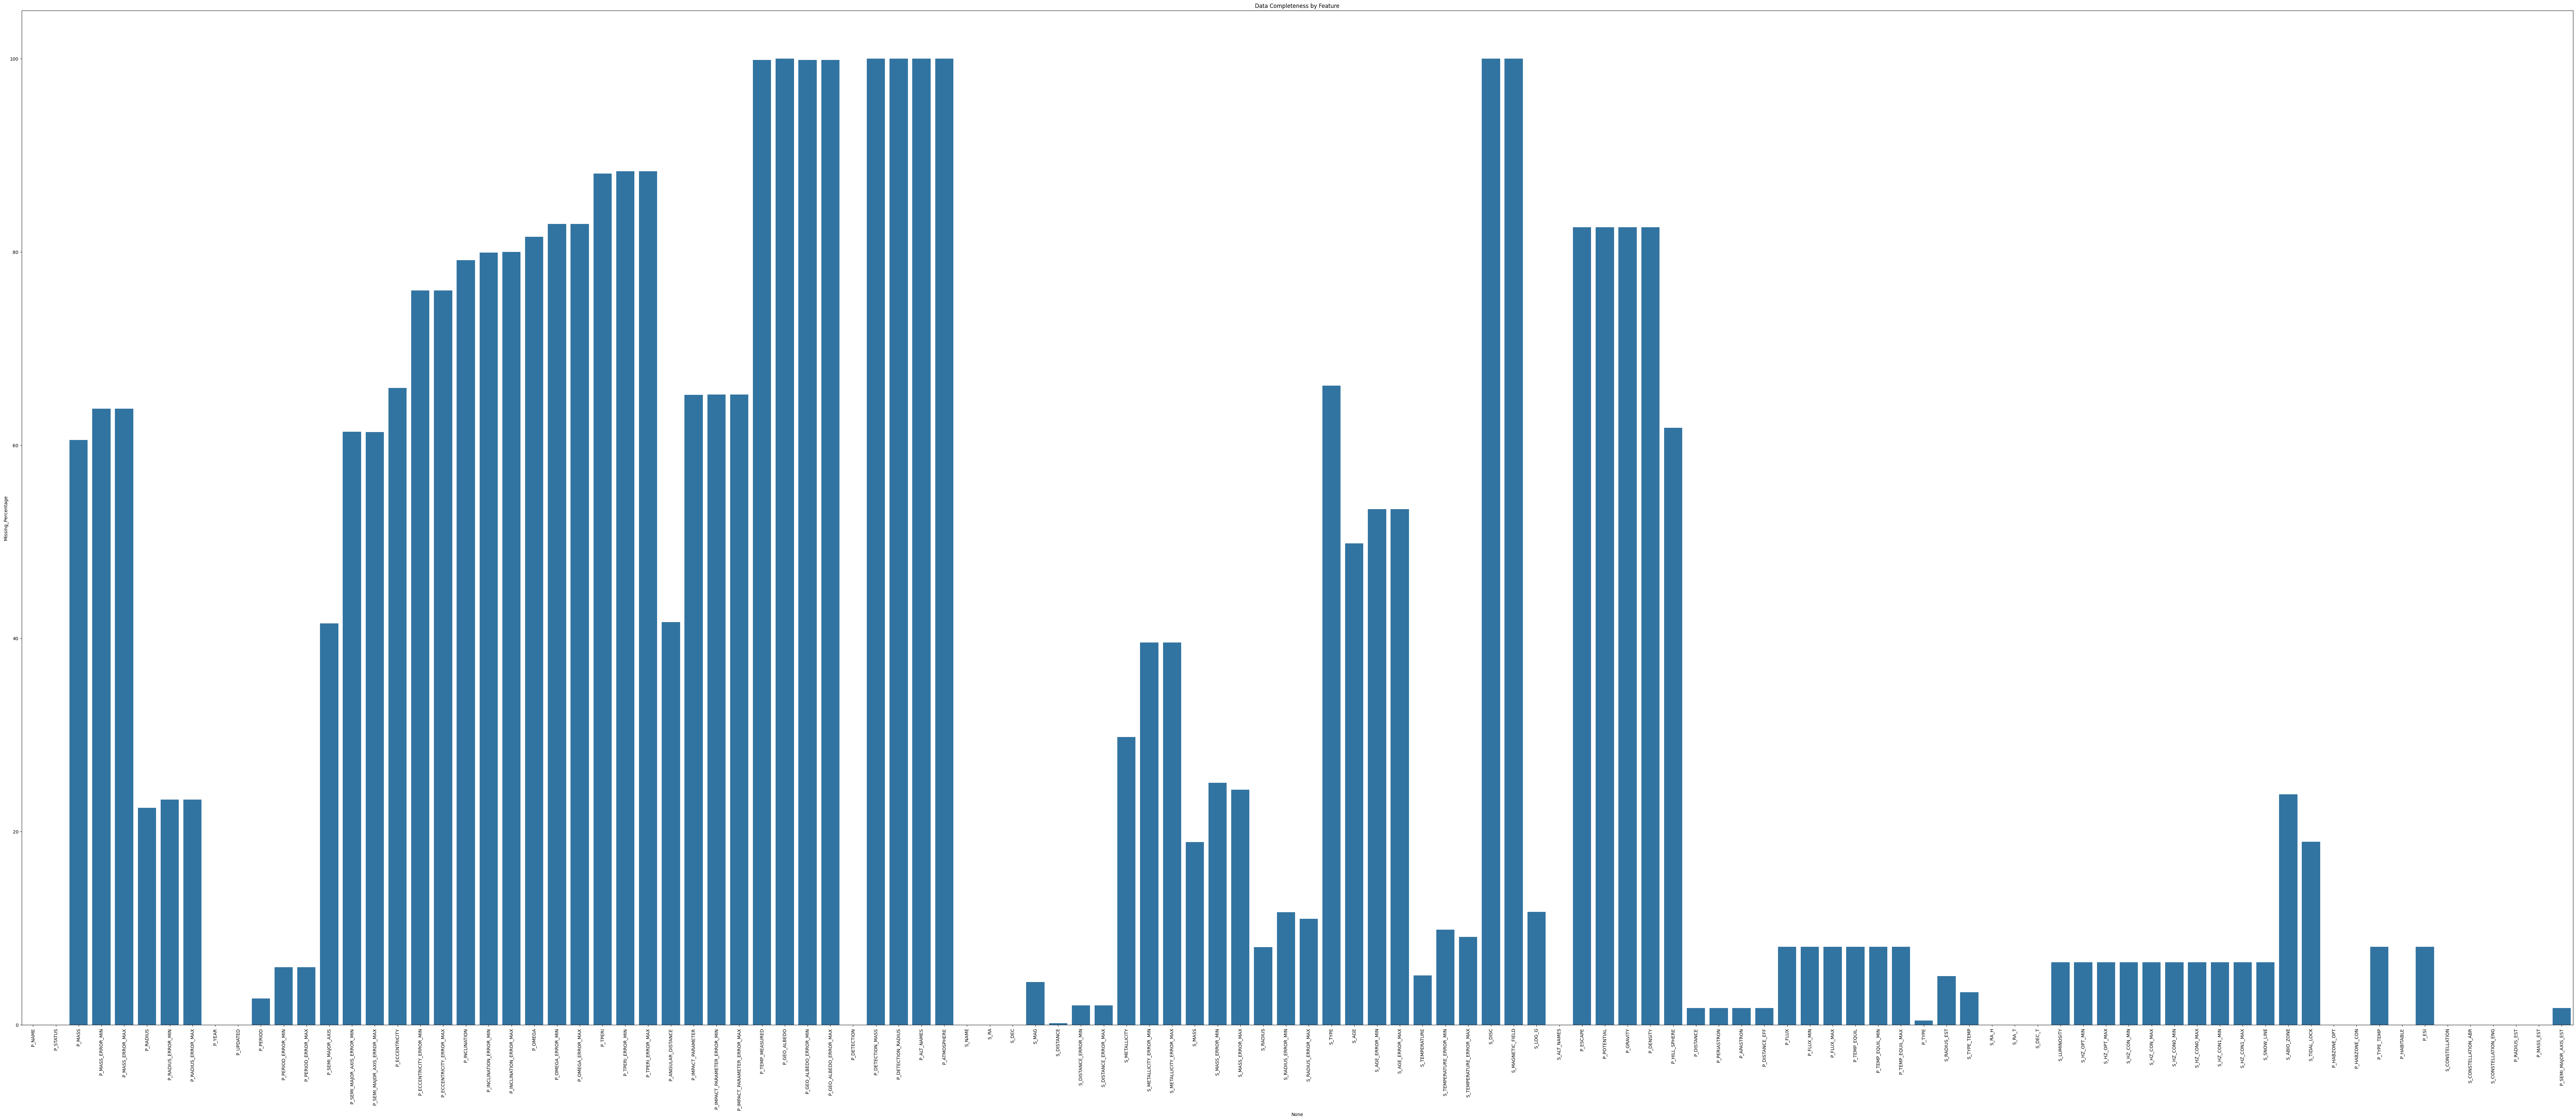

In [99]:
# Visualize missing values
plt.figure(figsize=(100, 40))
sns.barplot(
    x=absence_report.index,
    y=absence_report['Missing_Percentage']
)
plt.xticks(rotation=90)
plt.title("Data Completeness by Feature")
plt.show()

### Feature Distribution Analysis

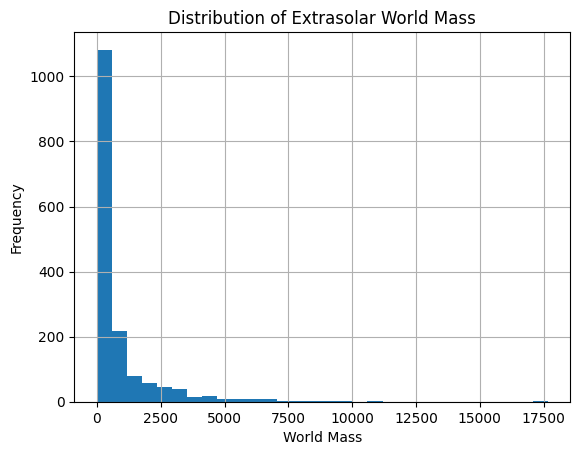

In [100]:
# World mass distribution
catalog['P_MASS'].hist(bins=30)
plt.title("Distribution of Extrasolar World Mass")
plt.xlabel("World Mass")
plt.ylabel("Frequency")
plt.show()

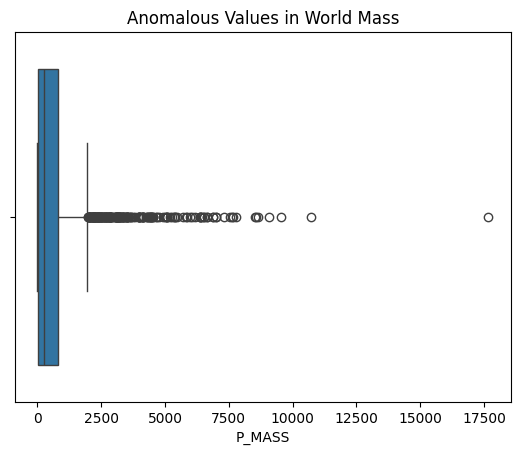

In [101]:
# Identify anomalies
sns.boxplot(x=catalog['P_MASS'])
plt.title("Anomalous Values in World Mass")
plt.show()

### Feature Relationships

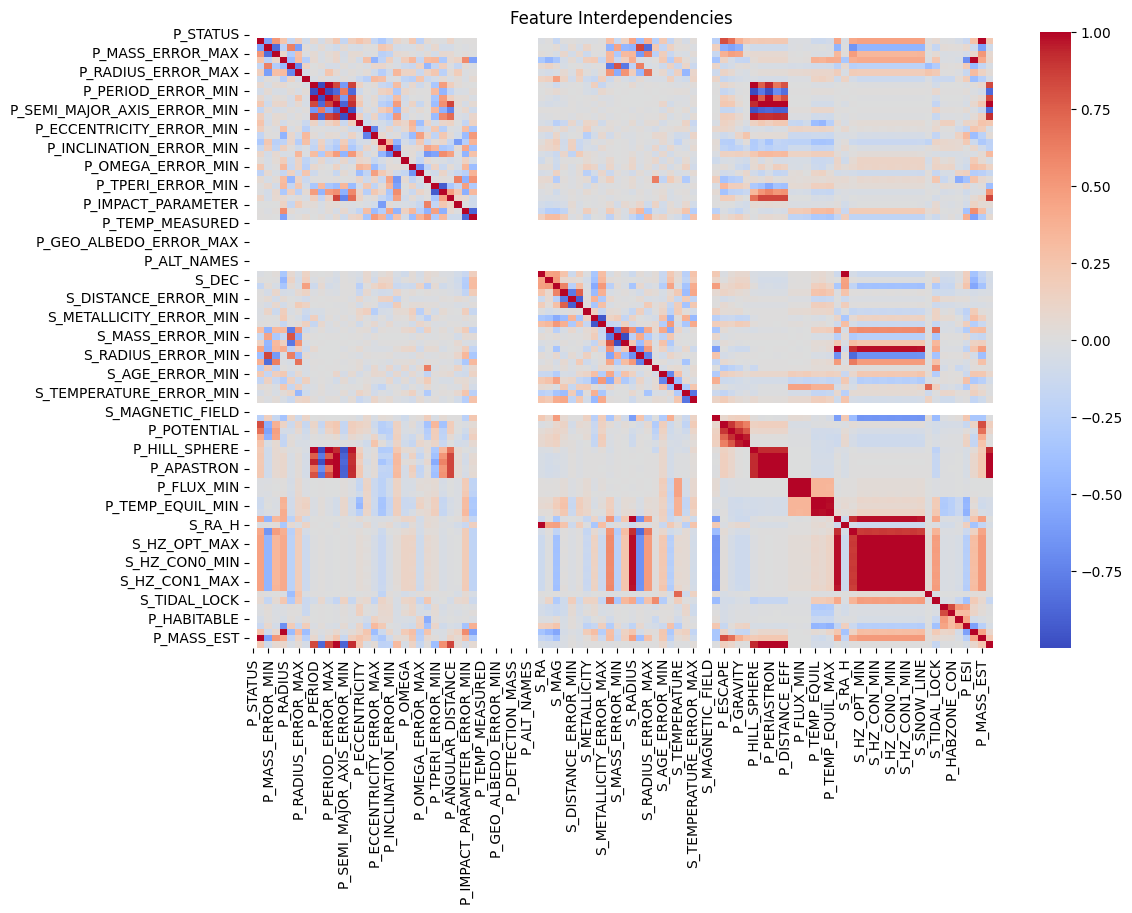

In [102]:
# Compute correlation matrix
correlation_analysis = catalog[numeric_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_analysis, cmap='coolwarm', center=0)
plt.title("Feature Interdependencies")
plt.show()

### Livability Assessment

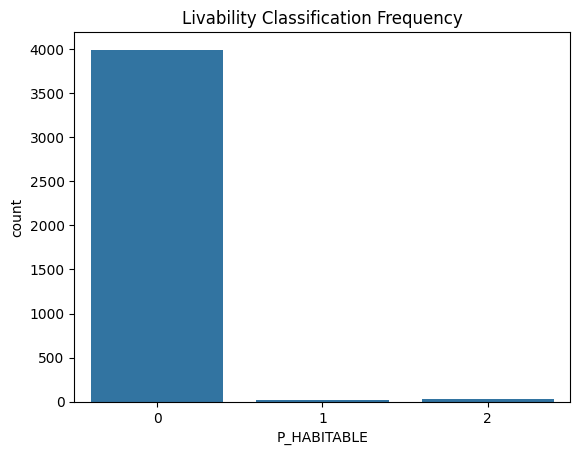

In [103]:
# Livability classification distribution
sns.countplot(x='P_HABITABLE', data=catalog)
plt.title("Livability Classification Frequency")
plt.show()

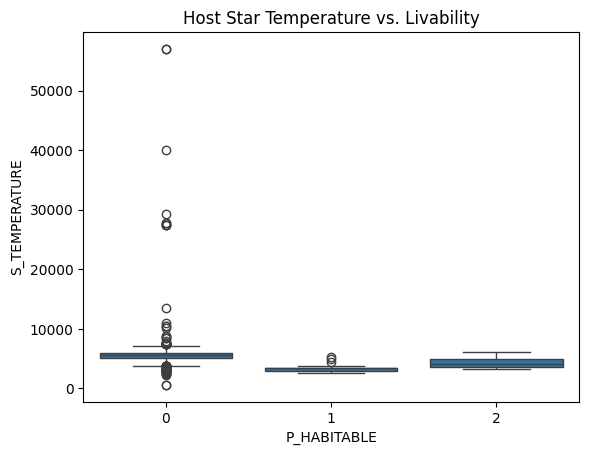

In [104]:
# Stellar temperature impact
sns.boxplot(
    x='P_HABITABLE',
    y='S_TEMPERATURE',
    data=catalog
)
plt.title("Host Star Temperature vs. Livability")
plt.show()

### Key Metrics Overview

In [105]:
# Critical livability indicators
critical_metrics = [
    'P_MASS', 'P_RADIUS', 'P_TEMP_EQUIL',
    'P_FLUX', 'S_TEMPERATURE', 'S_LUMINOSITY',
    'P_ESI'
]

catalog[critical_metrics].describe()

,P_MASS,P_RADIUS,P_TEMP_EQUIL,P_FLUX,S_TEMPERATURE,S_LUMINOSITY,P_ESI
count,1598.000000,3139.000000,3721.000000,3.721000e+03,3841.000000,3.786000e+03,3721.000000
mean,798.384920,4.191426,804.193202,6.166291e+02,5490.154056,5.786277e+00,0.261252
std,1406.808654,4.776830,459.516962,1.141227e+04,1764.957631,4.923779e+01,0.131333
min,0.019070,0.336300,2.688197,1.239553e-08,575.000000,7.933139e-07,0.006768
25%,26.548968,1.569400,472.076010,1.191188e+01,5020.000000,4.156723e-01,0.196982
50%,273.332080,2.331680,740.248470,7.139806e+01,5598.000000,9.050349e-01,0.271192
75%,806.488560,3.553570,1057.567300,2.983043e+02,5921.000000,1.839120e+00,0.303346
max,17668.059000,77.349000,7056.775700,5.886344e+05,57000.000000,1.486896e+03,0.931208


### Outlier Identification

In [106]:
# Statistical outlier detection
z_score_values = np.abs(zscore(catalog[numeric_features], nan_policy='omit'))
anomaly_count = (z_score_values > 3).sum(axis=0)

anomaly_count[anomaly_count > 0]

C:\Users\jeyab\AppData\Local\Temp\ipykernel_29372\2058298707.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_score_values = np.abs(zscore(catalog[numeric_features], nan_policy='omit'))


array([ 41,  13,   9,  34,  13,  14, 110,   2,   2,   2,  15,   7,   7,
        29,  14,  11,  28,  17,  11,   1,   8,  14,   5,   6,   7,   6,
         2,   4,   4,  13,  18,  59,  59,  63,  34,  31,  35,  16,   5,
         5,  42,  10,  10,   2,  11,   2,  11,  21,  47,  70,  17,  12,
         8,   8,  10,  20,  19,  20,  19,   3,   3,   3,  21,  22,  25,
        44,  23,  60,  58,  60,  58,  60,  58,  60,  58,  61,   2,  68,
       201, 138,  55,  74,   9,  97,  19])

### Dataset Characteristics Summary

In [107]:
# Overall dataset statistics
dataset_summary = {
    "Total Records": catalog.shape[0],
    "Total Features": catalog.shape[1],
    "Numeric Features": len(numeric_features),
    "Categorical Features": len(categorical_features),
    "Total Missing Values": catalog.isnull().sum().sum()
}

dataset_summary

{'Total Records': 4048,
 'Total Features': 112,
 'Numeric Features': 98,
 'Categorical Features': 14,
 'Total Missing Values': 149723}

## 3. Data Preparation and Transformation

In [108]:
# Initialize working copy
processing_data = catalog.copy()

In [109]:
# Identify essential features
retained_features = [
    # World dimensional properties
    'P_RADIUS', 'P_RADIUS_EST',
    'P_MASS', 'P_MASS_EST',
    'P_DENSITY',
    'P_TEMP_EQUIL', 'P_TEMP_MEASURED',

    # Orbital characteristics
    'P_PERIOD',
    'P_SEMI_MAJOR_AXIS', 'P_SEMI_MAJOR_AXIS_EST',

    # Stellar attributes
    'S_TYPE', 'S_TYPE_TEMP',
    'S_LUMINOSITY',
    'S_TEMPERATURE',
    'S_METALLICITY'
]

### Remove Incomplete Features

In [110]:
# Remove features exceeding completeness threshold
incompleteness_limit = 0.5 * len(processing_data)

features_to_remove = [
    feature for feature in processing_data.columns
    if processing_data[feature].isnull().sum() > incompleteness_limit
    and feature not in retained_features
]

processing_data.drop(columns=features_to_remove, inplace=True)

print("Removed features:", len(features_to_remove))
print("Retained features:", processing_data.shape[1])

Removed features: 34
Retained features: 78


In [111]:
print(features_to_remove)

['P_MASS_ERROR_MIN', 'P_MASS_ERROR_MAX', 'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_SEMI_MAJOR_AXIS_ERROR_MAX', 'P_ECCENTRICITY', 'P_ECCENTRICITY_ERROR_MIN', 'P_ECCENTRICITY_ERROR_MAX', 'P_INCLINATION', 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION_ERROR_MAX', 'P_OMEGA', 'P_OMEGA_ERROR_MIN', 'P_OMEGA_ERROR_MAX', 'P_TPERI', 'P_TPERI_ERROR_MIN', 'P_TPERI_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_IMPACT_PARAMETER_ERROR_MIN', 'P_IMPACT_PARAMETER_ERROR_MAX', 'P_GEO_ALBEDO', 'P_GEO_ALBEDO_ERROR_MIN', 'P_GEO_ALBEDO_ERROR_MAX', 'P_DETECTION_MASS', 'P_DETECTION_RADIUS', 'P_ALT_NAMES', 'P_ATMOSPHERE', 'S_AGE_ERROR_MIN', 'S_AGE_ERROR_MAX', 'S_DISC', 'S_MAGNETIC_FIELD', 'P_ESCAPE', 'P_POTENTIAL', 'P_GRAVITY', 'P_HILL_SPHERE']


In [112]:
print(processing_data)

          P_NAME  P_STATUS      P_MASS  P_RADIUS  P_RADIUS_ERROR_MIN  \
0       11 Com b       3.0  6165.86330       NaN                 NaN   
1       11 UMi b       3.0  4684.78480       NaN                 NaN   
2       14 And b       3.0  1525.57440       NaN                 NaN   
3       14 Her b       3.0  1481.07850       NaN                 NaN   
4     16 Cyg B b       3.0   565.73385       NaN                 NaN   
...          ...       ...         ...       ...                 ...   
4043    K2-296 b       3.0         NaN      1.87                0.45   
4044    K2-296 c       3.0         NaN      2.76                 NaN   
4045   GJ 1061 b       3.0     1.38000       NaN                 NaN   
4046   GJ 1061 c       3.0     1.75000       NaN                 NaN   
4047   GJ 1061 d       3.0     1.68000       NaN                 NaN   

      P_RADIUS_ERROR_MAX  P_YEAR   P_UPDATED     P_PERIOD  P_PERIOD_ERROR_MIN  \
0                    NaN    2007  2014-05-14   326.030

### Re-classify Features

In [113]:
# Identify feature types in processed data
numeric_features = processing_data.select_dtypes(include=[np.number]).columns
categorical_features = processing_data.select_dtypes(include=['object']).columns

print("Numeric Features:", len(numeric_features))
print("Categorical Features:", len(categorical_features))

Numeric Features: 64
Categorical Features: 14


### Gap Filling Strategy

In [114]:
# Fill numeric gaps with median
for feature in numeric_features:
    processing_data[feature] = processing_data[feature].fillna(
        processing_data[feature].median()
    )

In [115]:
# Fill categorical gaps with mode
for feature in categorical_features:
    processing_data[feature] = processing_data[feature].fillna(
        processing_data[feature].mode()[0]
    )

### Categorical to Numeric Encoding

In [116]:
# Encode categorical attributes
encoder = LabelEncoder()

for feature in categorical_features:
    processing_data[feature] = encoder.fit_transform(
        processing_data[feature].astype(str)
    )

### Data Quality Verification

In [117]:
print("Final Shape:", processing_data.shape)
print("Remaining Missing Values:", processing_data.isnull().sum().sum())

Final Shape: (4048, 78)
Remaining Missing Values: 0


### Save Processed Dataset

In [118]:
# Export processed data
processing_data.to_csv(
    "stellar_world_processed.csv",
    index=False
)

print("Saved: stellar_world_processed.csv")

Saved: stellar_world_processed.csv


## Distribution and Correlation Analysis

In [119]:
# Features for distribution analysis
examination_features = [
    'P_RADIUS', 'P_MASS', 'P_DENSITY',
    'P_TEMP_EQUIL', 'P_PERIOD',
    'S_TEMPERATURE', 'S_LUMINOSITY'
]

examination_features

['P_RADIUS',
 'P_MASS',
 'P_DENSITY',
 'P_TEMP_EQUIL',
 'P_PERIOD',
 'S_TEMPERATURE',
 'S_LUMINOSITY']

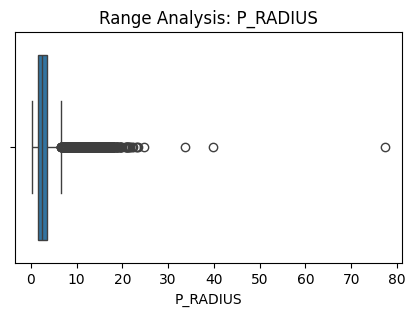

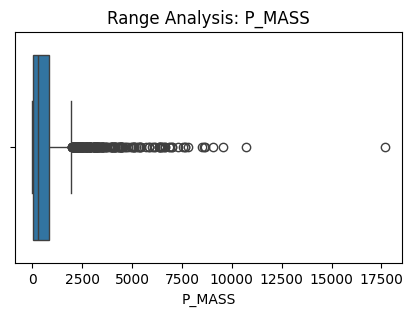

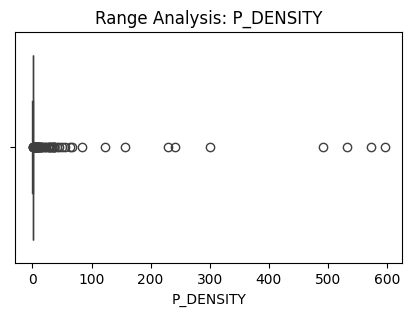

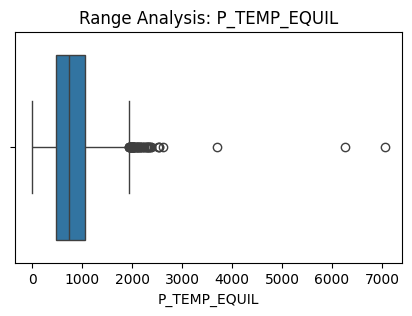

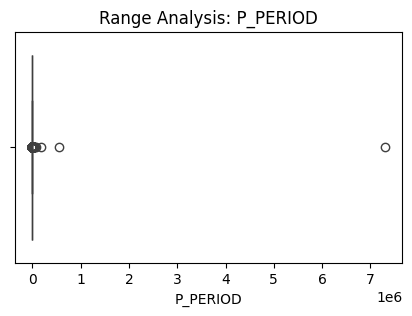

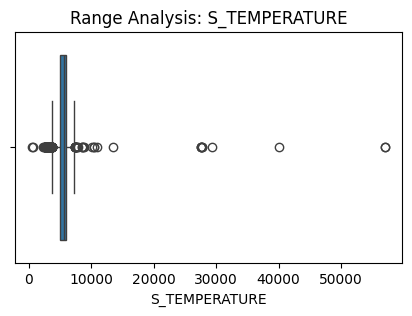

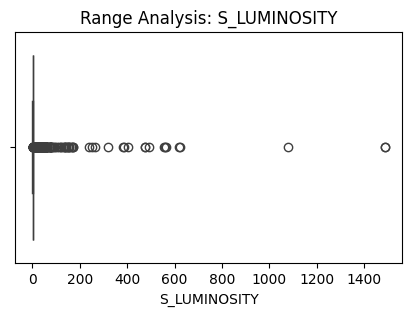

In [120]:
# Boxplot visualization for each feature
for feature in examination_features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=catalog[feature])
    plt.title(f"Range Analysis: {feature}")
    plt.show()

### Interdependency Heatmap

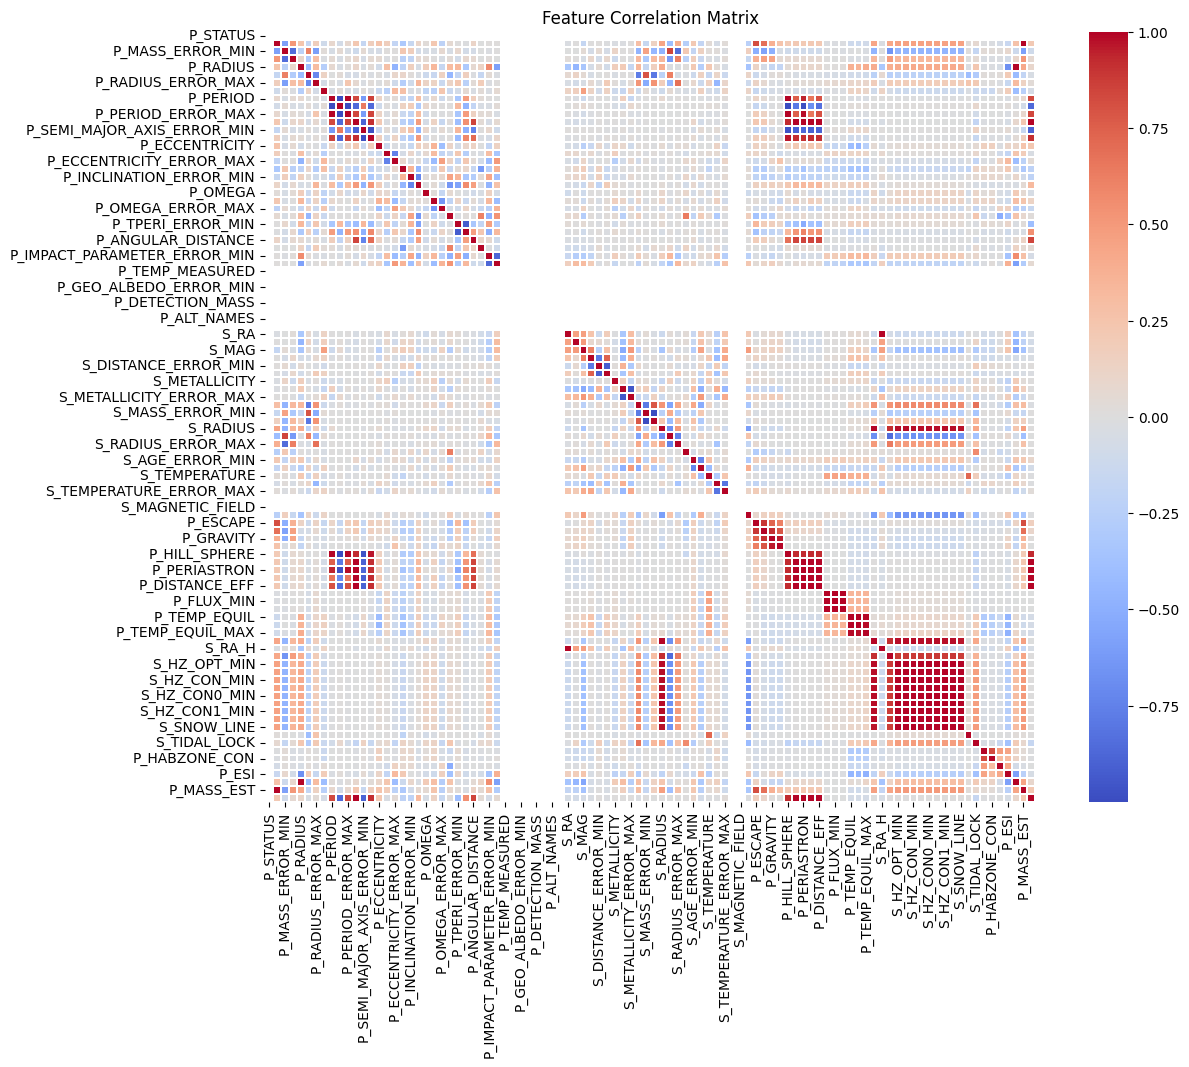

In [121]:
# Compute numerical feature correlations
numeric_subset = catalog.select_dtypes(include=[np.number])
feature_correlations = numeric_subset.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    feature_correlations,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.3
)
plt.title("Feature Correlation Matrix")
plt.show()

In [122]:
# Identify strong correlations
upper_triangle = feature_correlations.where(
    np.triu(np.ones(feature_correlations.shape), k=1).astype(bool)
)

# Find highly correlated feature pairs
strong_correlations = [
    column for column in upper_triangle.columns
    if any(abs(upper_triangle[column]) > 0.85)
]

print("Strong correlations detected (>0.85):")
strong_correlations

Strong correlations detected (>0.85):


['P_PERIOD_ERROR_MIN',
 'P_PERIOD_ERROR_MAX',
 'P_SEMI_MAJOR_AXIS',
 'P_SEMI_MAJOR_AXIS_ERROR_MIN',
 'P_SEMI_MAJOR_AXIS_ERROR_MAX',
 'P_TPERI_ERROR_MAX',
 'P_IMPACT_PARAMETER_ERROR_MAX',
 'S_DISTANCE_ERROR_MAX',
 'S_METALLICITY_ERROR_MAX',
 'S_MASS_ERROR_MAX',
 'S_RADIUS_ERROR_MIN',
 'S_RADIUS_ERROR_MAX',
 'P_POTENTIAL',
 'P_GRAVITY',
 'P_DENSITY',
 'P_HILL_SPHERE',
 'P_DISTANCE',
 'P_PERIASTRON',
 'P_APASTRON',
 'P_DISTANCE_EFF',
 'P_FLUX_MIN',
 'P_FLUX_MAX',
 'P_TEMP_EQUIL_MIN',
 'P_TEMP_EQUIL_MAX',
 'S_RADIUS_EST',
 'S_RA_H',
 'S_LUMINOSITY',
 'S_HZ_OPT_MIN',
 'S_HZ_OPT_MAX',
 'S_HZ_CON_MIN',
 'S_HZ_CON_MAX',
 'S_HZ_CON0_MIN',
 'S_HZ_CON0_MAX',
 'S_HZ_CON1_MIN',
 'S_HZ_CON1_MAX',
 'S_SNOW_LINE',
 'P_RADIUS_EST',
 'P_MASS_EST',
 'P_SEMI_MAJOR_AXIS_EST']

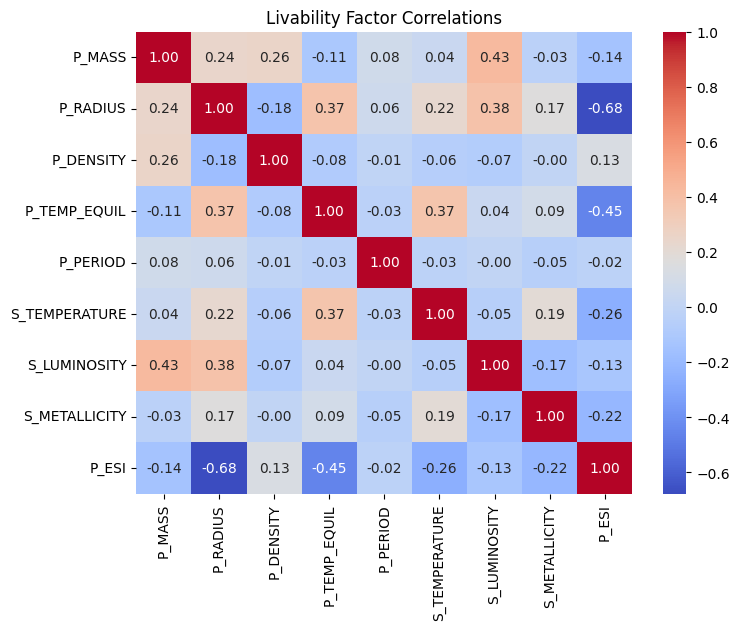

In [123]:
# Focus on livability-relevant features
habitable_features = [
    'P_MASS', 'P_RADIUS', 'P_DENSITY',
    'P_TEMP_EQUIL', 'P_PERIOD',
    'S_TEMPERATURE', 'S_LUMINOSITY',
    'S_METALLICITY', 'P_ESI'
]

plt.figure(figsize=(8,6))
sns.heatmap(
    catalog[habitable_features].corr(),
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Livability Factor Correlations')
plt.show()

### Dimensionality Reduction (PCA)

In [124]:
# PCA: robust handling of missing values to avoid empty datasets
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Select numeric features from the catalog
numeric_for_pca = catalog.select_dtypes(include=[np.number]).copy()

# Exclude target/label column if present
if 'P_HABITABLE' in numeric_for_pca.columns:
    numeric_for_pca = numeric_for_pca.drop(columns=['P_HABITABLE'])

# Drop columns that are almost entirely missing (e.g., >90% NaNs)
missing_frac = numeric_for_pca.isna().mean()
cols_to_keep = missing_frac[missing_frac <= 0.9].index
numeric_for_pca = numeric_for_pca[cols_to_keep]

# Impute remaining missing values with column medians (robust against outliers)
imputer = SimpleImputer(strategy='median')
numeric_imputed = imputer.fit_transform(numeric_for_pca)
numeric_imputed_df = pd.DataFrame(numeric_imputed, index=numeric_for_pca.index, columns=numeric_for_pca.columns)

# Scale features for PCA
scaler_pca = StandardScaler()
numeric_scaled = scaler_pca.fit_transform(numeric_imputed_df)

# Variance explanation
pca_full = PCA(n_components=min(10, numeric_scaled.shape[1]), random_state=42)
pca_full.fit(numeric_scaled)
explained_variance = pca_full.explained_variance_ratio_

print("PCA explained variance (first components):", np.round(explained_variance[:5], 4))

# Project to 2D for visualization
pca_2d = PCA(n_components=2, random_state=42)
numeric_pca_2d = pca_2d.fit_transform(numeric_scaled)

# Prepare a DataFrame for visualization/analysis
pca_df = pd.DataFrame({
    'PC1': numeric_pca_2d[:, 0],
    'PC2': numeric_pca_2d[:, 1],
    'P_HABITABLE': catalog.loc[numeric_for_pca.index, 'P_HABITABLE'].values if 'P_HABITABLE' in catalog.columns else 0
}, index=numeric_for_pca.index)

pca_df.head()

PCA explained variance (first components): [0.1736 0.1003 0.0622 0.0552 0.0453]


,PC1,PC2,P_HABITABLE
0,20.726265,-0.246216,0
1,26.463085,-1.152005,0
2,10.993913,-0.752987,0
3,0.031629,0.685584,0
4,0.276032,0.432971,0


### Note on PCA preprocessing
To prevent `StandardScaler` from failing due to an empty dataset after `dropna()`, this section now:
- Drops columns with extreme missingness (> 90%).
- Imputes remaining NaNs using median values per column.
- Scales the imputed features before PCA.

This ensures PCA runs on a stable numeric matrix without discarding all rows.

## 4. Data Partitioning

In [125]:
# Examine target variable
print(processing_data['P_HABITABLE'].value_counts())
print(processing_data['P_HABITABLE'].dtype)

P_HABITABLE
0    3993
2      34
1      21
Name: count, dtype: int64
int64


In [126]:
# Separate features and target
target_variable = 'P_HABITABLE'

# Output variable
y_values = processing_data[target_variable]

# Input variables
X_values = processing_data.drop(columns=[target_variable])

In [127]:
# Verify split
print(f"Features shape: {X_values.shape}")
print(f"Target shape: {y_values.shape}")

Features shape: (4048, 77)
Target shape: (4048,)


In [128]:
X_values

,P_NAME,P_STATUS,P_MASS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,...,P_HABZONE_OPT,P_HABZONE_CON,P_TYPE_TEMP,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0,3.0,6165.86330,2.33168,-0.23541,0.32509,2007,0,326.030000,-0.3200,...,0,0,1,0.083813,24,24,5,12.082709,6165.863300,1.29000
1,1,3.0,4684.78480,2.33168,-0.23541,0.32509,2009,146,516.219970,-3.2000,...,0,0,1,0.082414,83,83,42,12.229641,4684.784800,1.53000
2,2,3.0,1525.57440,2.33168,-0.23541,0.32509,2008,0,185.840000,-0.2300,...,0,0,1,0.081917,0,0,2,12.848516,1525.574400,0.83000
3,3,3.0,1481.07850,2.33168,-0.23541,0.32509,2002,146,1773.400000,-2.5000,...,0,0,0,0.145241,39,39,34,12.865261,1481.078500,2.93000
4,4,3.0,565.73385,2.33168,-0.23541,0.32509,1996,146,798.500000,-1.0000,...,1,1,2,0.368627,30,30,75,13.421749,565.733850,1.66000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,1194,3.0,273.33208,1.87000,0.45000,0.20000,2019,182,28.165600,0.0028,...,1,0,2,0.755038,85,85,82,1.870000,4.155456,0.13456
4044,1195,3.0,273.33208,2.76000,-0.23541,0.32509,2019,182,7.906961,0.0000,...,0,0,1,0.363831,85,85,82,2.760000,8.047485,0.05769
4045,129,3.0,1.38000,2.33168,-0.23541,0.32509,2019,183,3.204000,0.0010,...,0,0,1,0.588562,40,40,56,1.102775,1.380000,0.02100
4046,130,3.0,1.75000,2.33168,-0.23541,0.32509,2019,183,6.689000,0.0050,...,1,0,2,0.879042,40,40,56,1.178333,1.750000,0.03500


In [129]:
y_values

0       0
1       0
2       0
3       0
4       0
       ..
4043    2
4044    0
4045    0
4046    1
4047    1
Name: P_HABITABLE, Length: 4048, dtype: int64

### Feature Normalization

In [130]:
# Scale numeric features
numeric_feature_list = X_values.select_dtypes(include=[np.number]).columns

normalization_scaler = StandardScaler()
X_values[numeric_feature_list] = normalization_scaler.fit_transform(X_values[numeric_feature_list])

### Target Distribution Analysis

P_HABITABLE
0    3993
2      34
1      21
Name: count, dtype: int64


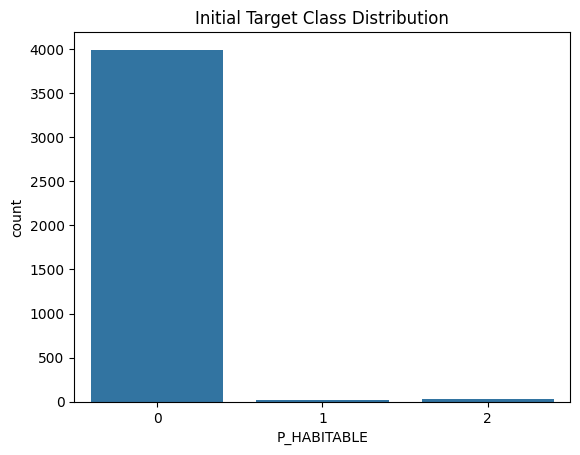

In [131]:
print(y_values.value_counts())

sns.countplot(x=y_values)
plt.title("Initial Target Class Distribution")
plt.show()

## Train-Test Split with Stratification

In [132]:
# Prepare integer target
y_class = y_values.astype(int)

In [133]:
# Stratified partition
X_train, X_test, y_train, y_test = train_test_split(
    X_values,
    y_class,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)

In [134]:
# Display partition sizes
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Training features shape: (3238, 77)
Test features shape: (810, 77)
Training labels shape: (3238,)
Test labels shape: (810,)


### Stratification Verification

In [135]:
print("Training partition distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest partition distribution:")
print(y_test.value_counts(normalize=True))

Training partition distribution:
P_HABITABLE
0    0.986411
2    0.008338
1    0.005250
Name: proportion, dtype: float64

Test partition distribution:
P_HABITABLE
0    0.986420
2    0.008642
1    0.004938
Name: proportion, dtype: float64


### Class Balance Adjustment (SMOTE)

In [136]:
# Apply SMOTE for synthetic oversampling
smote_sampler = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote_sampler.fit_resample(
    X_train, y_train
)

print("After SMOTE balancing:")
print(y_train_balanced.value_counts())

After SMOTE balancing:
P_HABITABLE
0    3194
2    3194
1    3194
Name: count, dtype: int64


### Post-Balance Distribution

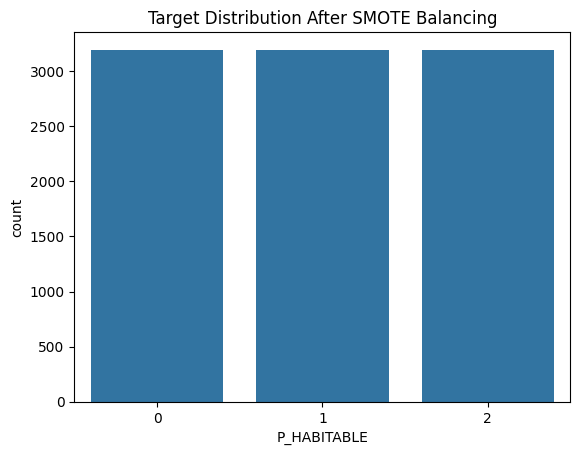

In [137]:
sns.countplot(x=y_train_balanced)
plt.title("Target Distribution After SMOTE Balancing")
plt.show()

### Final Dataset Preparation

In [138]:
print("Final Training Set:", X_train_balanced.shape)
print("Final Test Set:", X_test.shape)

Final Training Set: (9582, 77)
Final Test Set: (810, 77)


## 5. Machine Learning Models

### A. Logistic Regression Classifier

In [139]:
# Initialize logistic regression
lr_classifier = LogisticRegression(
    C=1,
    penalty='l2',
    solver='lbfgs',
    max_iter=1000,
    random_state=42,
    l1_ratio=None,
)

# Train model
lr_classifier.fit(X_train, y_train)

# Generate predictions
y_pred_lr = lr_classifier.predict(X_test)

C:\Users\jeyab\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\jeyab\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l2 with l1_ratio=None. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


In [140]:
# Confusion matrix
conf_matrix_lr = metrics.confusion_matrix(y_test, y_pred_lr)
conf_matrix_lr

array([[799,   0,   0],
       [  0,   2,   2],
       [  1,   2,   4]], dtype=int64)

In [141]:
# Classification metrics
print("\nLogistic Regression Classification Metrics:\n", metrics.classification_report(y_test, y_pred_lr))
print("---------------------------------------------------------------------")


Logistic Regression Classification Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           1       0.50      0.50      0.50         4
           2       0.67      0.57      0.62         7

    accuracy                           0.99       810
   macro avg       0.72      0.69      0.70       810
weighted avg       0.99      0.99      0.99       810

---------------------------------------------------------------------


In [142]:
# Accuracy score
print('Logistic Regression Accuracy: %0.2f' % metrics.accuracy_score(y_test, y_pred_lr))
print("-------------------------------------------------------------------")

Logistic Regression Accuracy: 0.99
-------------------------------------------------------------------


### B. Support Vector Machine Classifier

In [143]:
# Initialize SVM
svm_classifier = SVC(kernel='linear', random_state=1234, gamma='scale')
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test)

In [144]:
# Confusion matrix
conf_matrix_svm = metrics.confusion_matrix(y_test, y_pred_svm)
conf_matrix_svm

array([[799,   0,   0],
       [  0,   3,   1],
       [  0,   0,   7]], dtype=int64)

In [145]:
# Classification report
print("\nSVM Classification Metrics:\n", metrics.classification_report(y_test, y_pred_svm))
print("---------------------------------------------------------------------")


SVM Classification Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           1       1.00      0.75      0.86         4
           2       0.88      1.00      0.93         7

    accuracy                           1.00       810
   macro avg       0.96      0.92      0.93       810
weighted avg       1.00      1.00      1.00       810

---------------------------------------------------------------------


In [146]:
# Accuracy
print('SVM Accuracy: %0.2f' % metrics.accuracy_score(y_test, y_pred_svm))
print("-------------------------------------------------------------------")

SVM Accuracy: 1.00
-------------------------------------------------------------------


### C. K-Nearest Neighbors Classifier

In [147]:
# Initialize KNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
trained_knn = knn_classifier.fit(X_train, y_train)
y_pred_knn = trained_knn.predict(X_test)

In [148]:
# Confusion matrix
conf_matrix_knn = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
conf_matrix_knn

array([[799,   0,   0],
       [  2,   1,   1],
       [  1,   1,   5]], dtype=int64)

In [149]:
# Classification report
print("\nKNN Classification Metrics:\n", metrics.classification_report(y_test, y_pred_knn))
print("---------------------------------------------------------------------")


KNN Classification Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           1       0.50      0.25      0.33         4
           2       0.83      0.71      0.77         7

    accuracy                           0.99       810
   macro avg       0.78      0.65      0.70       810
weighted avg       0.99      0.99      0.99       810

---------------------------------------------------------------------


In [150]:
# Accuracy
print('KNN Accuracy: %0.2f' % metrics.accuracy_score(y_test, y_pred_knn))
print("-------------------------------------------------------------------")

KNN Accuracy: 0.99
-------------------------------------------------------------------


### D. Decision Tree Classifier

In [151]:
# Initialize Decision Tree
dt_classifier = DecisionTreeClassifier(
    criterion='entropy',
    min_samples_leaf=4,
    random_state=1234
)

# Train model
dt_classifier.fit(X_train, y_train)

# Predict
y_pred_dt = dt_classifier.predict(X_test)

In [152]:
# Confusion matrix
conf_matrix_dt = metrics.confusion_matrix(y_test, y_pred_dt)
conf_matrix_dt

array([[798,   0,   1],
       [  0,   4,   0],
       [  2,   0,   5]], dtype=int64)

In [153]:
# Classification report
print("\nDecision Tree Classification Metrics:\n", metrics.classification_report(y_test, y_pred_dt))
print("---------------------------------------------------------------------")


Decision Tree Classification Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           1       1.00      1.00      1.00         4
           2       0.83      0.71      0.77         7

    accuracy                           1.00       810
   macro avg       0.94      0.90      0.92       810
weighted avg       1.00      1.00      1.00       810

---------------------------------------------------------------------


In [154]:
# Accuracy
print('Decision Tree Accuracy: %0.2f' % metrics.accuracy_score(y_test, y_pred_dt))
print("-------------------------------------------------------------------")

Decision Tree Accuracy: 1.00
-------------------------------------------------------------------


### E. XGBoost Classifier

In [155]:
# Initialize XGBoost
xgb_model = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'multi:softprob'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes fr

### Livability Probability Predictions

In [156]:
# Generate predictions and probabilities
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification Metrics:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9987654320987654

XGBoost Classification Metrics:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       799
           1       1.00      1.00      1.00         4
           2       1.00      0.86      0.92         7

    accuracy                           1.00       810
   macro avg       1.00      0.95      0.97       810
weighted avg       1.00      1.00      1.00       810



### Evaluation: Confusion Matrices

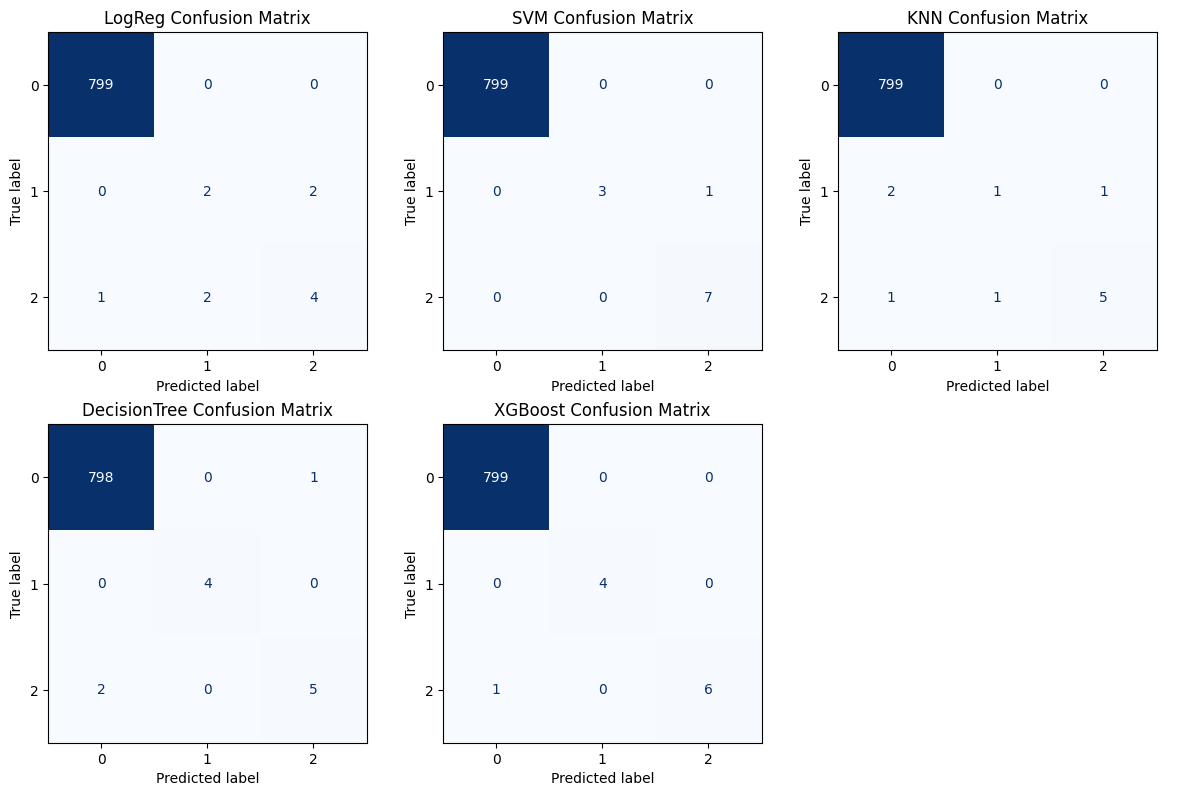

In [157]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

models = {
    'LogReg': lr_classifier,
    'SVM': svm_classifier,
    'KNN': knn_classifier,
    'DecisionTree': dt_classifier,
    'XGBoost': xgb_model,
}

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for ax, (name, model) in zip(axes, models.items()):
    preds = model.predict(X_test)
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, preds))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"{name} Confusion Matrix")

# Hide any unused subplot
if len(models) < len(axes):
    for ax in axes[len(models):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

### Evaluation: ROC Curves and Metrics

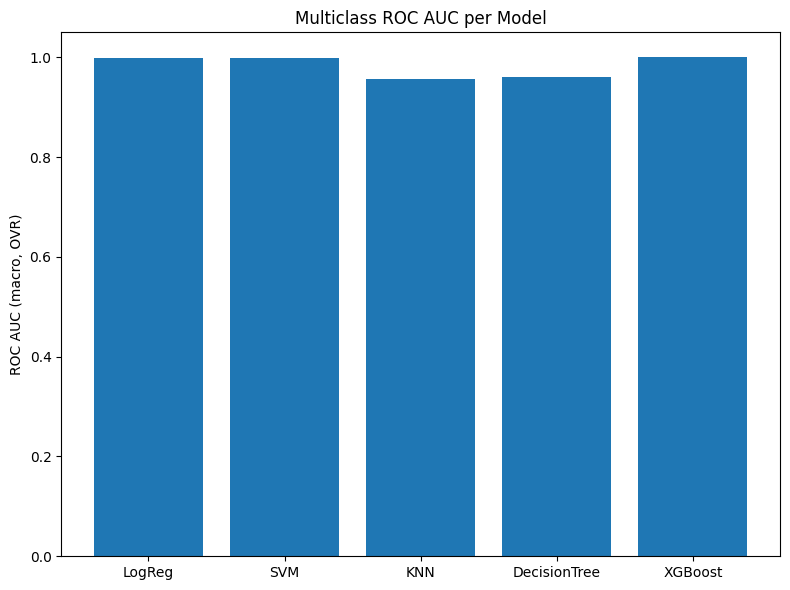

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
4,XGBoost,0.998765,0.999583,0.952381,0.974151,1.000000
1,SVM,0.998765,0.958333,0.916667,0.930159,0.999409
0,LogReg,0.993827,0.721806,0.690476,0.704920,0.999053
3,DecisionTree,0.996296,0.943611,0.904345,0.922452,0.960526
2,KNN,0.993827,0.776531,0.654762,0.700230,0.956332


In [158]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc
)
from scipy.special import softmax

metrics_summary = []

# Define model dictionary from previously trained models
models = {
    'LogReg': lr_classifier,
    'SVM': svm_classifier,
    'KNN': knn_classifier,
    'DecisionTree': dt_classifier,
    'XGBoost': xgb_model,
}

n_classes = len(np.unique(y_test))

if n_classes == 2:
    plt.figure(figsize=(8,6))
    for name, model in models.items():
        y_pred = model.predict(X_test)

        # Scores for ROC curve and AUC (binary)
        if hasattr(model, 'predict_proba'):
            y_score = model.predict_proba(X_test)[:, 1]
        else:
            y_score = model.decision_function(X_test)
            if y_score.ndim > 1:
                # Select positive-class score if decision_function returns 2D
                y_score = y_score[:, 1]

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        metrics_summary.append({
            'Model': name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1': f1,
            'ROC_AUC': roc_auc
        })

        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

    plt.plot([0,1],[0,1],'k--', alpha=0.6)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves (Binary)')
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    # Multiclass: compute macro-averaged metrics and OVR AUC
    for name, model in models.items():
        y_pred = model.predict(X_test)

        if hasattr(model, 'predict_proba'):
            y_score = model.predict_proba(X_test)
        else:
            y_score = model.decision_function(X_test)
            # Ensure 2D scores for multiclass
            if y_score.ndim == 1:
                y_score = np.column_stack([1 - y_score, y_score])

        # Convert decision scores to probabilities if they don't sum to 1
        row_sums = y_score.sum(axis=1)
        if not np.allclose(row_sums, 1.0):
            y_score = softmax(y_score, axis=1)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
        rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
        roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr', average='macro')

        metrics_summary.append({
            'Model': name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1': f1,
            'ROC_AUC': roc_auc
        })

    metrics_df = pd.DataFrame(metrics_summary)

    # Plot AUC as a bar chart for multiclass
    plt.figure(figsize=(8,6))
    plt.bar(metrics_df['Model'], metrics_df['ROC_AUC'])
    plt.ylabel('ROC AUC (macro, OVR)')
    plt.title('Multiclass ROC AUC per Model')
    plt.tight_layout()
    plt.show()

# Return sorted metrics table
metrics_df = pd.DataFrame(metrics_summary)
metrics_df.sort_values(by='ROC_AUC', ascending=False)